In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df[df.isna().any(axis=1)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [5]:
df.dropna(inplace = True)

In [6]:
df[df.isna().any(axis=1)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [7]:
from scipy import stats
import numpy as np

In [9]:
df['zscore'] = stats.zscore(df['fare_amount'])
outliers = df[np.abs(df['zscore']) > 3]
print("detected outliers")
print(outliers)

detected outliers
        Unnamed: 0                            key  fare_amount  \
48        22405517    2013-01-03 22:24:41.0000002        56.80   
84        25485719    2009-08-07 10:43:07.0000001        49.57   
104       46435788    2015-05-15 18:58:16.0000001        43.00   
204        6403066    2010-11-13 07:21:00.0000008        45.00   
226       24085207    2012-07-29 17:04:36.0000001        49.80   
...            ...                            ...          ...   
199914    17686068   2014-11-14 05:25:00.00000032        57.33   
199972    31236221    2010-08-20 13:19:55.0000001        45.00   
199976     1780041  2011-10-18 23:53:00.000000145        49.70   
199977    21117828    2012-11-20 21:04:30.0000001        43.50   
199982    13096190    2014-08-06 11:06:06.0000001        57.33   

                pickup_datetime  pickup_longitude  pickup_latitude  \
48      2013-01-03 22:24:41 UTC        -73.993498        40.764686   
84      2009-08-07 10:43:07 UTC        -73.975058

In [11]:
no_outliers_df = df[np.abs(df['zscore']) <= 3]
no_outliers_df.drop(axis = 1, columns = ['zscore'], inplace = True)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_10036\3837811205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_df.drop(axis = 1, columns = ['zscore'], inplace = True)


In [12]:
no_outliers_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [16]:
no_outliers_df.drop(axis = 1, columns = [df.columns[0], 'key', 'pickup_datetime'], inplace = True)
correlation_matrix = no_outliers_df.corr()
print(correlation_matrix)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000         -0.000925         0.001456   
pickup_longitude     -0.000925          1.000000        -0.811977   
pickup_latitude       0.001456         -0.811977         1.000000   
dropoff_longitude    -0.002646          0.832288        -0.772822   
dropoff_latitude      0.001663         -0.846307         0.696640   
passenger_count       0.011326         -0.000787        -0.001217   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                -0.002646          0.001663         0.011326  
pickup_longitude            0.832288         -0.846307        -0.000787  
pickup_latitude            -0.772822          0.696640        -0.001217  
dropoff_longitude           1.000000         -0.915675        -0.000151  
dropoff_latitude           -0.915675          1.000000        -0.000387  
passenger_count            -0.000151         -0.000387         1.000000 

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_10036\1529634575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_df.drop(axis = 1, columns = [df.columns[0], 'key', 'pickup_datetime'], inplace = True)


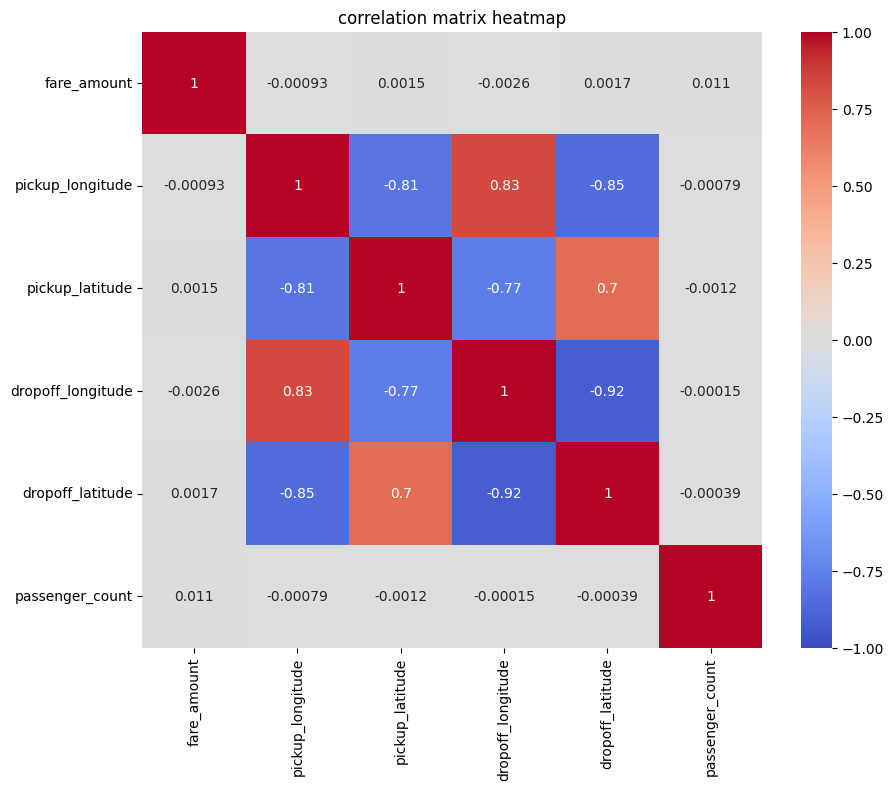

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('correlation matrix heatmap')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [20]:
x = no_outliers_df.drop("fare_amount", axis = 1)
y = no_outliers_df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

In [25]:
y_pred

array([10.23367192, 10.15111489, 10.23352338, ..., 10.07323654,
       10.15054698, 10.15054484])

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(rmse)
print(r2)

40.52858397741087
6.366206403927763
0.0002118592360659255


In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = model.predict(x_test)
y_pred

array([ 7.893     , 16.558     ,  8.221     , ...,  9.84749561,
       14.743     ,  6.947     ])

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(rmse)
print(r2)

8.548386267571113
2.923762347998057
0.7891222842191967
